C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ['FR' 0 3.5 ..., 0.0 0.0 0.0]
 ['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ..., 
 ['FR' 1 3.5 ..., 0.0 0.0 0.0]
 ['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ['FR' 1 3.5 ..., 0.0 0.0 0.0]]
10500 train samples
3150 test samples
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 ..., 
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 ..., 
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               22016     
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_22 (Activation)   (None, 128)    

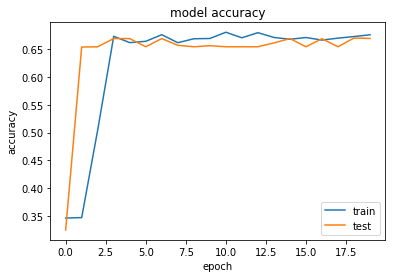

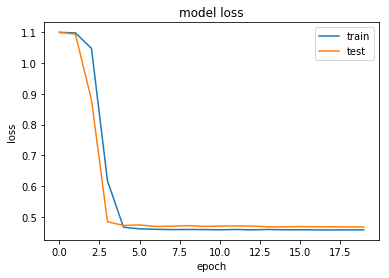

In [9]:
#program to plot the accuracy vs epoch and loss vs epoch

from __future__ import print_function
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


np.random.seed(1671)
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 3
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT=0.4
RESHAPED = 171
dataframe_train = pandas.read_csv("TrainingEdgesToAction.csv", header=None)
dataset_train_v = dataframe_train.values
#dataset_train = shuffle(dataset_train,random_state=0)
dataset_train_f = dataset_train_v[1:,0:172]
#print(dataset_train_f)
dataset_train_n = shuffle(dataset_train_f)
print(dataset_train_n)

X_train = dataset_train_n[0:,1:172].astype(float)
Y_train = dataset_train_n[0:,0]

#Y_train = shuffle(Y_test,random_state=0)

dataframe_test = pandas.read_csv("TestingEdgesToAction.csv", header=None)
dataset_test = dataframe_test.values
dataset_test_ft = dataset_test[1:,0:172]
dataset_test_nt = shuffle(dataset_test_ft)
X_test = dataset_test_nt[0:,1:172].astype(float)
Y_test = dataset_test_nt[0:,0]

#X_test = dataset_test[1:,1:172].astype(float)
#Y_test = dataset_test[1:,0]


X_train = X_train.reshape(10500,RESHAPED)
X_test = X_test.reshape(3150,RESHAPED)
X_train /= 255
X_test /= 255




print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')


encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y_train = encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)
print(dummy_y_train)
#Y_train_s = shuffle(dummy_y_train,random_state=0)

encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Y_test = encoder.transform(Y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
print(dummy_y_test)
#Y_test_s= shuffle(dummy_y_test,random_state=0)

#Y_train = np_utils.to_categorical(Y_train,NB_CLASSES)
#Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

model = Sequential()
model.add(Dense(N_HIDDEN,input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history = model.fit(X_train,dummy_y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test,dummy_y_test,verbose=VERBOSE)

print("\nTest score:",score[0])
print("Test accuracy:",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()